# 第一步 

In [278]:
!pip install xlwt
!pip install xlrd

In [279]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cmath
import math
import random
from collections import Counter
from scipy import optimize
import pulp as pl
import time
from tqdm import tqdm
import xlwt
import xlrd
import matplotlib.pyplot as plt

In [280]:
#生成点坐标
def Pointer(x,y):
    p = (x,y)
    return p

In [281]:
#极坐标转为直角坐标系
def convert_coordinate(r_long, angle):
    radian = math.radians(angle)
    cn1 = cmath.rect(r_long, radian)
    #生成点坐标
    p=Pointer(cn1.real,cn1.imag)
    #print(p)
    return p

#p4 = convert_coordinate(str(2),105, 119.75)
#p4
#p4[0]

In [282]:
#点坐标
p1 = convert_coordinate(100, 0)
p2 = convert_coordinate(98, 40.10)
p3 = convert_coordinate(112, 80.21)
p4 = convert_coordinate(105, 119.75)
p5 = convert_coordinate(98, 159.86)
p6 = convert_coordinate(112, 199.96)
p7 = convert_coordinate(105, 240.07)
p8 = convert_coordinate(98, 280.17)
p9 = convert_coordinate(112, 320.28)

In [283]:
#计算夹角
def cal_ang(point_1, point_2, point_3):
    global B
    try:
        """
        根据三点坐标计算夹角
        :param point_1: 点1坐标
        :param point_2: 点2坐标
        :param point_3: 点3坐标
        :return: 返回任意角的夹角值，这里只是返回点2的夹角
        """
        a=math.sqrt((point_2[0]-point_3[0])*(point_2[0]-point_3[0])+(point_2[1]-point_3[1])*(point_2[1] - point_3[1]))
        b=math.sqrt((point_1[0]-point_3[0])*(point_1[0]-point_3[0])+(point_1[1]-point_3[1])*(point_1[1] - point_3[1]))
        c=math.sqrt((point_1[0]-point_2[0])*(point_1[0]-point_2[0])+(point_1[1]-point_2[1])*(point_1[1]-point_2[1]))
        A=math.degrees(math.acos((a*a-b*b-c*c)/(-2*b*c)))
        B=math.degrees(math.acos((b*b-a*a-c*c)/(-2*a*c)))
        C=math.degrees(math.acos((c*c-a*a-b*b)/(-2*a*b)))
    except:
        pass
    return B

#cal_ang((0,0), p4, (100,0))

In [284]:
#计算标准角
def stand_angle(number):
    if number == 1:
        sta = 0
    else:
        sta = round(math.degrees(math.asin(math.cos((number-1)*20*math.pi/180.0))), 2)
    print("airport_"+ str(number)+" 's standard angle is ", sta)
    return sta

sta_1 = stand_angle(1)
sta_2 = stand_angle(2)
sta_3 = stand_angle(3)
sta_4 = stand_angle(4)
sta_5 = stand_angle(5)
sta_6 = stand_angle(6)
sta_7 = stand_angle(7)
sta_8 = stand_angle(8)
sta_9 = stand_angle(9)

airport_1 's standard angle is  0
airport_2 's standard angle is  70.0
airport_3 's standard angle is  50.0
airport_4 's standard angle is  30.0
airport_5 's standard angle is  10.0
airport_6 's standard angle is  -10.0
airport_7 's standard angle is  -30.0
airport_8 's standard angle is  -50.0
airport_9 's standard angle is  -70.0


In [285]:
#标准角判断
def judge (a_right, point, important1):
    a = round(cal_ang((0,0),point,(100,0)),important1)
    #print(a)
    if a == abs(a_right):
        j = 0
    elif a < abs(a_right):
        #在外接圆外
        j = 1
    elif a > abs(a_right):
        #在外接圆内
        j = -1
    return j

#j = judge (-50, p8, 1)
#j

In [286]:
def move (a_right, point, IM1):
    global new_point, count
    IM2 = 0.1**(IM1+2)
    try:
        j = judge (a_right, point, important1)
        if j == 0:
            #print("Done!")
            pass
        
        elif j == 1:
            #print("起始位置在圆外")
            u = 0
            count = 0
            while(u <=100):
                arr = np.array(point,dtype = float)
                arr[0] = arr[0]*(1- u)
                arr[1] = arr[1]*(1- u)
                new_point = tuple(arr)
                new_j = judge (a_right, new_point, IM1)
                u+= IM2
                count+= 1
                if new_j == 0:
                    #print("Done" ,count)
                    break
                else:
                    continue
                    
        elif j == -1:
            #print("起始位置在圆内")
            u = 0
            count = 0
            while(u <=100):
                arr = np.array(point,dtype = float)
                arr[0] = arr[0]*(1+ u)
                arr[1] = arr[1]*(1+ u)
                new_point = tuple(arr)
                new_j = judge (a_right, new_point, IM1)
                u+= IM2
                count+= 1
                if new_j == 0:
                    #print("Done",count)
                    break
        
                else:
                    continue
    
                
    except:
        #print("已在圆周上，不需移动")
        new_point = point
        count = 0
        pass
    
    return [new_point,count]

In [287]:
###关键参数
important1 = 1

In [288]:
#产生计数数组
def Counting (IM1):
    List1 = move (sta_1, p1, IM1)
    count1 = List1[1]
    List2 = move (sta_2, p2, IM1)
    count2 = List2[1]
    List3 = move (sta_3, p3, IM1)
    count3 = List3[1]
    List4 = move (sta_4, p4, IM1)
    count4 = List4[1]
    List5 = move (sta_5, p5, IM1)
    count5 = List5[1]
    List6 = move (sta_6, p6, IM1)
    count6 = List6[1]
    List7 = move (sta_7, p7, IM1)
    count7 = List7[1]
    List8 = move (sta_8, p8, IM1)
    count8 = List8[1]
    List9 = move (sta_9, p9, IM1)
    count9 = List9[1]
    #剔除第一个点
    List = [count2, count3, count4, count5, count6, count7, count8, count9]
    return List

#Count = Counting(important1)
#Count

In [289]:
#调参后生成第一步移动后的直角坐标
important1 = 1
List1 = move (sta_1, p1, important1)
P1 = List1[0]
List2 = move (sta_2, p2, important1)
P2 = List2[0]
List3 = move (sta_3, p3, important1)
P3 = List3[0]
List4 = move (sta_4, p4, important1) 
P4 = List4[0]
List5 = move (sta_5, p5, important1)
P5 = List5[0]
List6 = move (sta_6, p6, important1)
P6 = List6[0]
List7 = move (sta_7, p7, important1)
P7 = List7[0]
List8 = move (sta_8, p8, important1)
P8 = List8[0]
List9 = move (sta_9, p9, important1)
P9 = List9[0]

In [290]:
#第一步到达到坐标点的极坐标
def polar(new_point):
    cn = complex(new_point[0], new_point[1])
    cn = cmath.polar(cn)
    arr = np.array(cn,dtype = float)
    arr[1] = math.degrees(arr[1])
    if arr[1]<0:
        arr[1] = arr[1]+360
    else:
        pass
    p = tuple(arr)
    #print(p)
    return p

polar1 = polar(P1)
polar2 = polar(P2)
polar3 = polar(P3)
polar4 = polar(P4)
polar5 = polar(P5)
polar6 = polar(P6)
polar7 = polar(P7)
polar8 = polar(P8)
polar9 = polar(P9)

def evaluation(fina_point,k): #极坐标
    arr = np.array(fina_point,dtype = float)
    r = abs(arr[0]-100)/2
    sita = abs(arr[1]-(k-1)*40)/1
    #print(sita)
    error = round((0.5*r + 0.5*sita),5)
    #print(error)
    return error

#第一步的误差


In [291]:
###用于调参后展示
print("判断角度是否符合标准角的精度为", important1)
important2 = 0.1**(important1+2)
print("每次调整机位的移动距离", important2*100)

print("----------------------------------airport_1----------------------------------")
List1 = move (sta_1, p1, important1)
P1 = List1[0]
count1 = List1[1]
print("Count is ", count1)
print("New point finished by first step ", P1)

print("----------------------------------airport_2----------------------------------")
List2 = move (sta_2, p2, important1)
P2 = List2[0]
count2 = List2[1]
print("Count is ", count2)
print("New point finished by first step ", P2)

print("----------------------------------airport_3----------------------------------")
List3 = move (sta_3, p3, important1)
P3 = List3[0]
count3 = List3[1]
print("Count is ", count3)
print("New point finished by first step ", P3)

print("----------------------------------airport_4----------------------------------")
List4 = move (sta_4, p4, important1) 
P4 = List4[0]
count4 = List4[1]
print("Count is ", count4)
print("New point finished by first step ", P4)

print("----------------------------------airport_5----------------------------------")
List5 = move (sta_5, p5, important1)
P5 = List5[0]
count5 = List5[1]
print("Count is ", count5)
print("New point finished by first step ", P5)

print("----------------------------------airport_6----------------------------------")
List6 = move (sta_6, p6, important1)
P6 = List6[0]
count6 = List6[1]
print("Count is ", count6)
print("New point finished by first step ", P6)

print("----------------------------------airport_7----------------------------------")
List7 = move (sta_7, p7, important1)
P7 = List7[0]
count7 = List7[1]
print("Count is ", count7)
print("New point finished by first step ", P7)

print("----------------------------------airport_8----------------------------------")
List8 = move (sta_8, p8, important1)
P8 = List8[0]
count8 = List8[1]
print("Count is ", count8)
print("New point finished by first step ", P8)

print("----------------------------------airport_9----------------------------------")
List9 = move (sta_9, p9, important1)
P9 = List9[0]
count9 = List9[1]
print("Count is ", count9)
print("New point finished by first step ", P9)


判断角度是否符合标准角的精度为 1
每次调整机位的移动距离 0.10000000000000002
----------------------------------airport_1----------------------------------
Count is  2
New point finished by first step  (100.1, 0.0)
----------------------------------airport_2----------------------------------
Count is  21
New point finished by first step  (76.46154323580645, 64.38659803094819)
----------------------------------airport_3----------------------------------
Count is  110
New point finished by first step  (16.968383242969097, 98.3387880447981)
----------------------------------airport_4----------------------------------
Count is  39
New point finished by first step  (-50.12282903623279, 87.69676225154826)
----------------------------------airport_5----------------------------------
Count is  26
New point finished by first step  (-94.30789470014662, 34.5864640752138)
----------------------------------airport_6----------------------------------
Count is  103
New point finished by first step  (-94.53451703946867, -34.3330

# 第二步

In [292]:
#接受到到新角度信息
alpha = cal_ang((0,0), P7, P1)
beta = cal_ang((0,0), P7, P4)
gamma = cal_ang(P5, P7, P4)
print(alpha,beta,gamma)

29.97141765208454 29.925635015013942 19.957515329075004


In [293]:
#极坐标距离
def p_distance(po1, po2):
    arr1 = np.array(po1,dtype = float)
    arr2 = np.array(po2,dtype = float)
    dis = math.sqrt(arr1[0]**2+arr2[0]**2-2*arr1[0]*arr1[0]*math.cos((arr1[1]-arr2[1])*math.pi/180.0))
    print(type(arr1[1]))
    return dis

# 随机模拟

In [294]:
#随机生成九个点 (p1,p2,p3,,,)
def rough_position (r, sta):
    low = sta - math.degrees(2*math.pi/180)
    high = sta + math.degrees(2*math.pi/180)
    new_sta = random.uniform(low,high)
    if new_sta<0:
        new_sta = new_sta+360
    else:
        pass
    r = random.uniform(100-15,100+15)
    position = (r,new_sta)
    return position

In [295]:
def monte (N):
    n=1
    D4=[]
    D5=[]
    D7=[]
    A4=[]
    A5=[]
    A7=[]
    ALPHA = []
    BETA = []
    GAMMA = []
    try:
        #while (n<=N):
        while n in tqdm(range(N)):
            #初始极坐标
            org4 = rough_position(100,(4-1)*40)
            org5 = rough_position(100,(5-1)*40)
            org7 = rough_position(100,(7-1)*40)
            #初始直角坐标
            ra_p4 = convert_coordinate(org4[0], org4[1])
            ra_p5 = convert_coordinate(org5[0], org5[1])
            ra_p7 = convert_coordinate(org7[0], org7[1])
            #调用move (P1,P1,P3...)
            #第一步之后点直角坐标
            ra_important1 = 1
            ra_List4 = move (sta_4, ra_p4, ra_important1)
            ra_P4 = ra_List4[0]
            ra_List5 = move (sta_5, ra_p5, ra_important1)
            ra_P5 = ra_List5[0]
            ra_List7 = move (sta_7, ra_p7, ra_important1)
            ra_P7 = ra_List7[0]
            #第一步之后的极坐标
            FY04 = polar(ra_P4)
            FY05 = polar(ra_P5)
            FY07 = polar(ra_P7)
            #输入数组
            dis_FY04 = FY04[0]
            D4.append(dis_FY04)
            agl_FY04 = FY04[1]
            A4.append(agl_FY04)
            dis_FY05 = FY05[0]
            D5.append(dis_FY05)
            agl_FY05 = FY05[1]
            A5.append(agl_FY05)
            dis_FY07 = FY07[0]
            D7.append(dis_FY07)
            agl_FY07 = FY07[1]
            A7.append(agl_FY07)
        
            #夹角用直角坐标算
            alpha = cal_ang((0,0), ra_P7, (100,0))
            ALPHA.append(alpha)
            beta = cal_ang((0,0), ra_P7, ra_P4)
            BETA.append(beta)
            gamma = cal_ang(ra_P5, ra_P7, ra_P4)
            GAMMA.append(gamma)
            n+= 1
    except:
        pass
    
    #创建表格
    data = {"FY04距离":D4,
            "FY04角度":A4,
            "FY05距离":D5,
            "FY05角度":A5,
            "FY07距离":D7,
            "FY07角度":A7,
            "alpha":ALPHA,
            "beta":BETA,
            "gamma":GAMMA}
    
    df = pd.DataFrame(data)

    return df
    
#m_df = monte (101)
#m_df.head(5)

In [296]:
#m_df.shape

In [297]:
#save
#m_df.to_excel("./step1_output.xls")

# 参数设置与误差分析

参数讨论（只在第一步涉及）

参数：

1）判断角度相等的精确位数

2）迭代的步幅 = 0.1**（精度+2）

关键参数 = 精度

评价指标：

1）精确度误差

2）迭代次数

In [298]:
def Average(X):
    average=sum(X)/len(X)
    return average

In [350]:
def Error_aya (rand7,IM1):
    global error7
    NEW_List7 = move (sta_7, rand7, IM1)
    R7 = NEW_List7[0]
    Polar7 = polar(R7)
    error7 = evaluation(Polar7,7)
    return error7

In [351]:
def monte (N):
    n=1
    PA = []
    try:
        #while (n<N):
        while n in tqdm(range(N)):
            org7 = rough_position(100,(7-1)*40)
            ra_p7 = convert_coordinate(org7[0], org7[1])
            pre_pa =[]
            for i in range (1,6):
                ra_List7 = move (sta_7, ra_p7, i)
                ra_P7 = ra_List7[0]
                print(ra_P7)
                pre_error = Error_aya (ra_P7,i)
                pre_pa.append(pre_error)
            PA.append(pre_pa)
            n+= 1
 
    except:
        pass

    return PA

In [353]:
res = monte (11)
res

  0%|          | 0/11 [00:00<?, ?it/s]


(-49.671182152983924, -92.97953454620107)
(-49.77087126201695, -93.16614268708783)
(-49.78170703473828, -93.18642618066312)
(-49.7827472689247, -93.18837339605604)
(-49.78286862971418, -93.18860057143678)


  0%|          | 0/11 [00:00<?, ?it/s]

(-50.07807088089696, -89.57987962742564)
(-49.97598039304959, -89.39725970114647)
(-49.963084752479155, -89.37419192098446)


(-49.96179518841978, -89.37188514296408)
(-49.96166623196366, -89.37165446507228)


  0%|          | 0/11 [00:00<?, ?it/s]

(-49.72218238085929, -92.2320079590876)
(-49.81929601832189, -92.41214859963267)
(-49.828521813880805, -92.42926196048438)


(-49.829832847986864, -92.43169385913232)
(-49.82993481730101, -92.43188300679527)


  0%|          | 0/11 [00:00<?, ?it/s]

(-49.73421328905435, -91.70753575881596)
(-49.84308853706017, -91.90829656389221)
(-49.856589067813054, -91.93319090372195)


(-49.857590720099935, -91.9350379031383)
(-49.85769524046914, -91.93523063375295)


  0%|          | 0/11 [00:00<?, ?it/s]

(-49.999276503150774, -81.81577143179307)
(-49.88998846707823, -81.63693914451032)
(-49.87687390274968, -81.61547927003666)


(-49.87556244631311, -81.6133332825832)
(-49.875464087003444, -81.61317233339832)


  0%|          | 0/11 [00:00<?, ?it/s]

(-49.76848554783517, -90.53315734424092)
(-49.89859923554199, -90.76984533729787)
(-49.910681220829176, -90.79182350808195)


(-49.91198235770854, -90.7941903880167)
(-49.91208923685782, -90.79438481038522)


  0%|          | 0/11 [00:00<?, ?it/s]

(-49.68635411609833, -80.47575397395546)
(-49.814853307777916, -80.68388092388814)
(-49.824371766421, -80.69929773499452)


(-49.82560916604565, -80.70130192044005)
(-49.825723387563336, -80.70148692219594)


  0%|          | 0/11 [00:00<?, ?it/s]

(-49.766710460769666, -90.75653312404366)
(-49.89245725104955, -90.98584992299652)
(-49.901646439569966, -91.00260768907378)


(-49.902903907473345, -91.00490085706437)
(-49.90302481784251, -91.00512135397531)


  0%|          | 0/11 [00:00<?, ?it/s]

(-50.020820989676686, -82.42198456065351)
(-49.91673141998712, -82.25047060434221)
(-49.9057441876313, -82.23236635339875)


(-49.90447198177259, -82.23027007169904)
(-49.90437367479523, -82.23010808602967)


  0%|          | 0/11 [00:00<?, ?it/s]

(-50.1294718386178, -84.75897649043972)
(-49.98957563813791, -84.5224398118617)
(-49.97908342310185, -84.50469956096823)


(-49.97809249167478, -84.50302409281646)
(-49.97796425331913, -84.50280726723716)


  0%|          | 0/11 [00:00<?, ?it/s]


[[2.29794, 2.35083, 2.35658, 2.35713, 2.35719],
 [1.05353, 1.00122, 0.99461, 0.99395, 0.99389],
 [2.0307, 2.08186, 2.08672, 2.08741, 2.08746],
 [1.84554, 1.90263, 1.90971, 1.91024, 1.91029],
 [1.74397, 1.79636, 1.80265, 1.80328, 1.80332],
 [1.42836, 1.49588, 1.50215, 1.50283, 1.50288],
 [2.20114, 2.13999, 2.13546, 2.13487, 2.13482],
 [1.50731, 1.57269, 1.57747, 1.57812, 1.57819],
 [1.52326, 1.57341, 1.57871, 1.57932, 1.57937],
 [0.68239, 0.75109, 0.75625, 0.75673, 0.7568]]

In [361]:
res2 = ([[i[j] for i in res] for j in range(len(res[0]))])
res2

[[2.29794,
  1.05353,
  2.0307,
  1.84554,
  1.74397,
  1.42836,
  2.20114,
  1.50731,
  1.52326,
  0.68239],
 [2.35083,
  1.00122,
  2.08186,
  1.90263,
  1.79636,
  1.49588,
  2.13999,
  1.57269,
  1.57341,
  0.75109],
 [2.35658,
  0.99461,
  2.08672,
  1.90971,
  1.80265,
  1.50215,
  2.13546,
  1.57747,
  1.57871,
  0.75625],
 [2.35713,
  0.99395,
  2.08741,
  1.91024,
  1.80328,
  1.50283,
  2.13487,
  1.57812,
  1.57932,
  0.75673],
 [2.35719,
  0.99389,
  2.08746,
  1.91029,
  1.80332,
  1.50288,
  2.13482,
  1.57819,
  1.57937,
  0.7568]]

In [369]:
pdata = {"(0.1)^1":res2[0],
            "(0.1)^2":res2[1],
            "(0.1)^3":res2[2],
            "(0.1)^4":res2[3],
            "(0.1)^5":res2[4]}
    
para_df = pd.DataFrame(pdata)
para_df

,(0.1)^1,(0.1)^2,(0.1)^3,(0.1)^4,(0.1)^5
0,2.29794,2.35083,2.35658,2.35713,2.35719
1,1.05353,1.00122,0.99461,0.99395,0.99389
2,2.03070,2.08186,2.08672,2.08741,2.08746
3,1.84554,1.90263,1.90971,1.91024,1.91029
4,1.74397,1.79636,1.80265,1.80328,1.80332
5,1.42836,1.49588,1.50215,1.50283,1.50288
6,2.20114,2.13999,2.13546,2.13487,2.13482
7,1.50731,1.57269,1.57747,1.57812,1.57819
8,1.52326,1.57341,1.57871,1.57932,1.57937
9,0.68239,0.75109,0.75625,0.75673,0.75680


In [370]:
para_df.to_excel("./para_output.xls")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.


In [302]:
##剔除第一个点
#X = [2,3,4,5,6,7,8,9]

#Error1 = Error_aya(1)
#avf_E1 = Average(Error1)
#print(Error1,avf_E1)
#Error2 = Error_aya(2)
#avf_E2 = Average(Error2)
#print(Error2,avf_E2)
#Error3 = Error_aya(3)
#avf_E3 = Average(Error3)
#print(Error3,avf_E3)
#Error4 = Error_aya(4)
#avf_E4 = Average(Error4)
#print(Error4,avf_E4)
#Error5 = Error_aya(5)
#avf_E5 = Average(Error5)
#print(Error5,avf_E5)


In [303]:
#Count1 = Counting(1)
#avg_C1 = Average(Count1)
#print(Count1, avg_C1)
#Count2 = Counting(2)
#avg_C2 = Average(Count2)
#print(Count2, avg_C2)
#Count3 = Counting(3)
#avg_C3 = Average(Count3)
#print(Count3, avg_C3)
#Count4 = Counting(4)
#avg_C4 = Average(Count4)
#print(Count4, avg_C4)
#Count5 = Counting(5)
#avg_C5 = Average(Count5)
#print(Count5, avg_C5)

构造关于精度和迭代次数的综合平价方程，由于我们的方法

# 结果分析

讨论第二步后得分的提升效果

做结果对比表

In [304]:
def evaluation(fina_point,k): #极坐标
    arr = np.array(fina_point,dtype = float)
    r = abs(arr[0]-100)/2
    sita = abs(arr[1]-(k-1)*40)/1
    #print(sita)
    error = round((0.5*r + 0.5*sita),5)
    #print(error)
    return error

In [305]:
df1 = pd.read_excel("../input/step111/step1_output.xls")
#df1

In [306]:
ERROR_1=[]
scatter1_r=[]
scatter1_a=[]
for i in range(0, len(df1)):
    global step1_point
    step1_point = (df1.loc[i]['FY07距离'],df1.loc[i]['FY07角度'])
    step1_error = evaluation(step1_point,7)
    #print(step1_error)
    ERROR_1.append(step1_error)
    r = step1_point[0]
    scatter1_r.append(r)
    a = math.radians(step1_point[1])
    scatter1_a.append(a)

#ERROR_1
#scatter1_r
#scatter1_a

In [307]:
df2 = pd.read_excel("../input/step222/.xlsx")
df2.drop(columns=["第一步完成后"],inplace=True)
df2.columns = ['lenth','angle']
#df2

In [308]:
ERROR_2=[]
scatter2_r=[]
scatter2_a=[]
for i in range(0, len(df2)):
    global step2_point
    step2_point = (df2.loc[i]['lenth'],df2.loc[i]['angle'])
    step2_error = evaluation(step2_point,7)
    #print(step2_error)
    ERROR_2.append(step2_error)
    r = step2_point[0]
    scatter2_r.append(r)
    a = math.radians(step2_point[1])
    scatter2_a.append(a)

In [309]:
ERROR_1_AVG = Average(ERROR_1)
ERROR_2_AVG = Average(ERROR_2)
print(ERROR_1_AVG,ERROR_2_AVG)

1.1589167999999999 0.8468195999999998


In [310]:
re_data = {"Error_1":ERROR_1,
            "Error_2":ERROR_2}
    
result_df = pd.DataFrame(re_data)
result_df

,Error_1,Error_2
0,1.53364,1.25952
1,1.37374,1.24277
2,2.00855,1.21849
3,0.69492,0.69412
4,1.22667,1.22577
...,...,...
95,0.78292,0.78128
96,0.78591,0.68795
97,0.35435,0.35501
98,2.26632,1.22207


In [311]:
result_df.describe()

,Error_1,Error_2
count,100.000000,100.000000
mean,1.158917,0.846820
std,0.674794,0.391368
min,0.043650,0.024880
25%,0.624238,0.525842
50%,1.118845,0.906460
75%,1.722065,1.251900
max,2.553550,1.259520


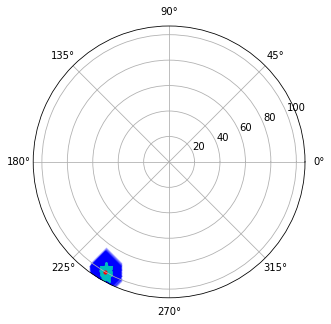

In [312]:
plt.figure(figsize=(5, 5))
#散点半径
r0 = [100]
r1 = scatter1_r
r2 = scatter2_r
#散点角度
a0 = [math.radians(240)]
a1 = scatter1_a
a2 = scatter2_a

# 绘制极坐标，111表示 1*1矩阵第1个
ax = plt.subplot(111, projection='polar')
# 绘制散点图，参数（角度、半径、颜色）
ax.scatter(a1, r1, s=480, c="b", marker = "D",
               cmap='hsv', alpha=0.1, label="Step_1")
ax.scatter(a2, r2, s=140, c="c", marker = "*",
               cmap='hsv', alpha=0.5, label="Step_2")
ax.scatter(a0, r0, s=10, c="r", marker = "o",
               cmap='hsv', alpha=1, label="Step_0")

#plt.legend() #分别为图例无边框、图例放在右上角、图例大小
plt.savefig('./polarnone.png', dpi=300)

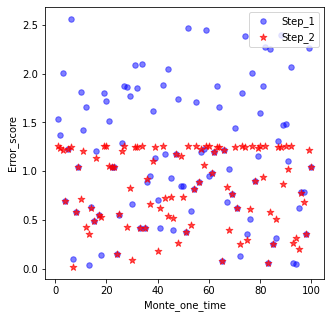

In [313]:
X =  []
for i in range(1,101):
    X.append(i)
    

plt.figure(figsize=(5, 5))
plt.scatter(X,ERROR_1,s=30, c="b", marker = "o",
               cmap='hsv', alpha=0.5, label="Step_1")
plt.scatter(X,ERROR_2,s=50, c="r", marker = "*",
               cmap='hsv', alpha=0.7, label="Step_2")
plt.xlabel('Monte_one_time')
plt.ylabel('Error_score')
plt.legend()
plt.savefig('./scatter.png', dpi=300)